In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('tic-tac-toe-endgame.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


<AxesSubplot:>

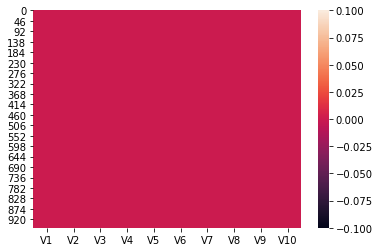

In [5]:
sns.heatmap(df.isna())

In [6]:
df['V1'].unique()

array(['x', 'o', 'b'], dtype=object)

<AxesSubplot:xlabel='V1', ylabel='Count'>

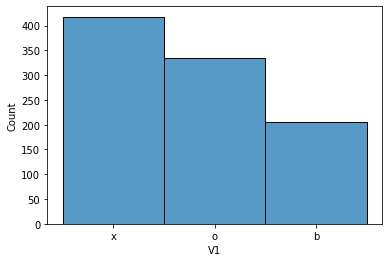

In [7]:
sns.histplot(df['V1'])

<AxesSubplot:xlabel='V2', ylabel='Count'>

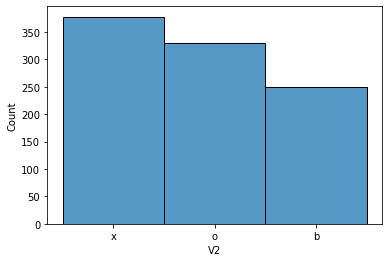

In [8]:
sns.histplot(df['V2'])

<AxesSubplot:xlabel='V3', ylabel='Count'>

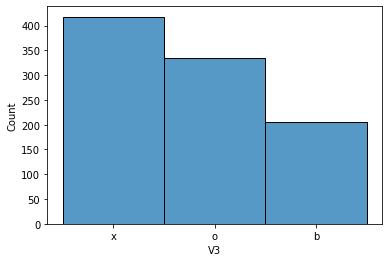

In [9]:
sns.histplot(df['V3'])

<AxesSubplot:xlabel='V4', ylabel='Count'>

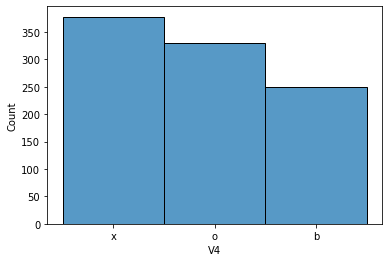

In [10]:
sns.histplot(df['V4'])

<AxesSubplot:xlabel='V5', ylabel='Count'>

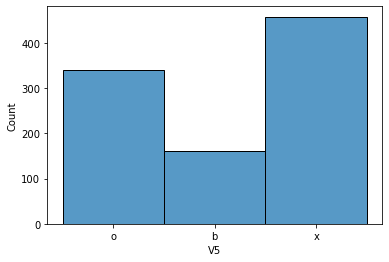

In [11]:
sns.histplot(df['V5'])

<AxesSubplot:xlabel='V6', ylabel='Count'>

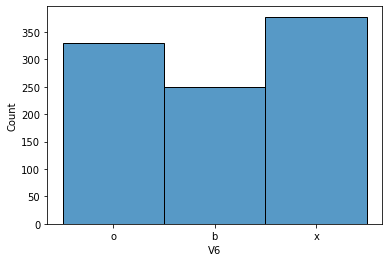

In [12]:
sns.histplot(df['V6'])

<AxesSubplot:xlabel='V7', ylabel='Count'>

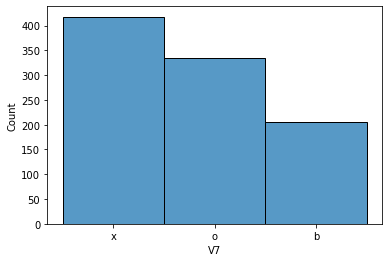

In [13]:
sns.histplot(df['V7'])

<AxesSubplot:xlabel='V8', ylabel='Count'>

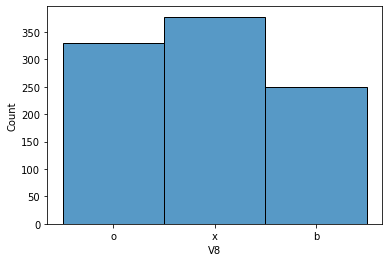

In [14]:
sns.histplot(df['V8'])

<AxesSubplot:xlabel='V9', ylabel='Count'>

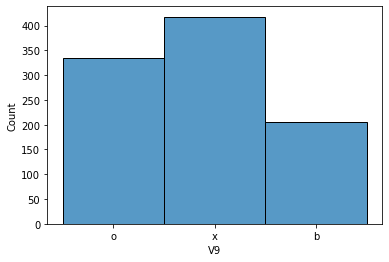

In [15]:
sns.histplot(df['V9'])

<AxesSubplot:xlabel='V10', ylabel='Count'>

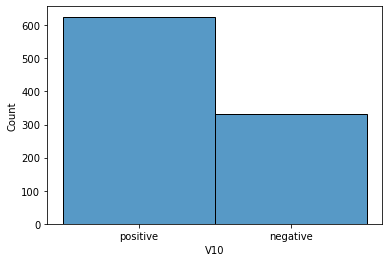

In [16]:
sns.histplot(df['V10'])

In [17]:
v1=pd.get_dummies(df[['V1']],drop_first=True)
v2=pd.get_dummies(df[['V2']],drop_first=True)
v3=pd.get_dummies(df[['V3']],drop_first=True)
v4=pd.get_dummies(df[['V4']],drop_first=True)
v5=pd.get_dummies(df[['V5']],drop_first=True)
v6=pd.get_dummies(df[['V6']],drop_first=True)
v7=pd.get_dummies(df[['V7']],drop_first=True)
v8=pd.get_dummies(df[['V8']],drop_first=True)
v9=pd.get_dummies(df[['V7']],drop_first=True)

In [18]:
df1=pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9],axis=1)

In [19]:
df1

,V1_o,V1_x,V2_o,V2_x,V3_o,V3_x,V4_o,V4_x,V5_o,V5_x,V6_o,V6_x,V7_o,V7_x,V8_o,V8_x,V7_o,V7_x
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
954,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
955,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
956,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1


In [20]:
l=LabelEncoder()
df['V10']=l.fit_transform(df["V10"])

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1


In [22]:
x=df1.iloc[:,:]
y=df.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
p=d.predict(x_test)

In [26]:
print(confusion_matrix(y_test,p))

[[ 71  15]
 [ 24 130]]


In [27]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78        86
           1       0.90      0.84      0.87       154

    accuracy                           0.84       240
   macro avg       0.82      0.83      0.83       240
weighted avg       0.84      0.84      0.84       240



In [28]:
accuracy_score(y_test,p)

0.8375